# Overfitting with Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('../data/overfit100.csv')

In [5]:
df.sample(3)

,a0,a1,class
120,0.529859,0.468033,0
8,-1.540212,0.409674,0
478,-0.924665,-1.085732,0


In [6]:
X = df.iloc[:,0:2].values.reshape(-1, 2) # reshape to 2-dim array with 1 column
y = df['class'].values.reshape(-1, )

In [7]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


Let's train a model using a 10% training set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

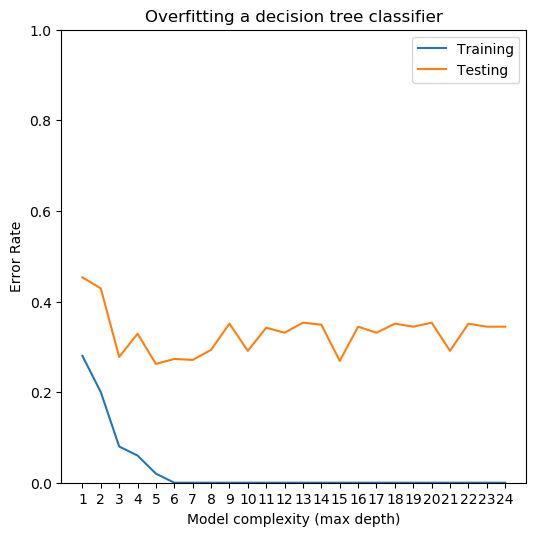

In [11]:
scores_te = []
scores_tr = []
domain = list(np.arange(1, 25, 1))
for cx in domain:

    clf = DecisionTreeClassifier(max_depth=cx)

    clf.fit(X_train, y_train)

    scores_tr.append(1-clf.score(X_train, y_train))
    scores_te.append(1-clf.score(X_test, y_test))

plt.figure(figsize=(6,6), dpi=100)
plt.title("Overfitting a decision tree classifier")
plt.plot(domain, scores_tr, label="Training")
plt.plot(domain, scores_te, label="Testing")
plt.xlabel("Model complexity (max depth)")
plt.ylabel("Error Rate")
plt.xticks(domain)
plt.legend(loc="best")
plt.ylim(0.0, 1.0)
plt.show()

Now let's double the training set size

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

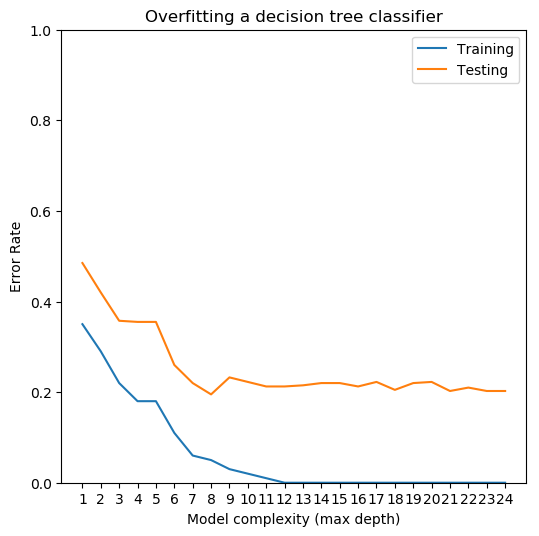

In [13]:
scores_te = []
scores_tr = []
domain = list(np.arange(1, 25, 1))
for cx in domain:

    clf = DecisionTreeClassifier(max_depth=cx)

    clf.fit(X_train, y_train)

    scores_tr.append(1-clf.score(X_train, y_train))
    scores_te.append(1-clf.score(X_test, y_test))

plt.figure(figsize=(6,6), dpi=100)
plt.title("Overfitting a decision tree classifier")
plt.plot(domain, scores_tr, label="Training")
plt.plot(domain, scores_te, label="Testing")
plt.xlabel("Model complexity (max depth)")
plt.ylabel("Error Rate")
plt.xticks(domain)
plt.legend(loc="best")
plt.ylim(0.0, 1.0)
plt.show()

### Notice two major differences when training size is increased:

1. The rate of decrease is smaller. (It takes longer -- more complex model -- to get training error rate down)
2. The gap between the training and test error rates is smaller.